# DAIA 
* survived passenger of titanic  prediction 

In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt 
from pandas.plotting import scatter_matrix
import seaborn as sns
%matplotlib inline

train = pd.read_csv ('./titanic/train.csv' )
test = pd.read_csv('./titanic/test.csv')
test_y = pd.read_csv('./titanic/gender_submission.csv')

### EDA

**data check**

In [2]:
train.shape , test.shape, test_y.shape

((891, 12), (418, 11), (418, 2))

In [3]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
train = train.set_index('PassengerId')

In [5]:
test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [6]:
test = test.set_index('PassengerId')

In [7]:
test_y.head()

,PassengerId,Survived
0,892,0
1,893,1
2,894,0
3,895,0
4,896,1


In [8]:
test_y =  test_y.set_index('PassengerId')

In [9]:
# test_y 와 test 셋 합치기
test = pd.concat([test_y, test],axis=1) 

In [10]:
# train_flag  train 인지 아닌지 표시 
train['train_flag']=1
test['train_flag']=0

train = pd.concat([train,test])

In [11]:
train.tail()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,train_flag
PassengerId,,,,,,,,,,,,
1305,0,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S,0
1306,1,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C,0
1307,0,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S,0
1308,0,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S,0
1309,0,3,"Peter, Master. Michael J",male,NaN,1,1,2668,22.3583,NaN,C,0


In [12]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1309 entries, 1 to 1309
Data columns (total 12 columns):
Survived      1309 non-null int64
Pclass        1309 non-null int64
Name          1309 non-null object
Sex           1309 non-null object
Age           1046 non-null float64
SibSp         1309 non-null int64
Parch         1309 non-null int64
Ticket        1309 non-null object
Fare          1308 non-null float64
Cabin         295 non-null object
Embarked      1307 non-null object
train_flag    1309 non-null int64
dtypes: float64(2), int64(5), object(5)
memory usage: 132.9+ KB


Name, Ticket 명목형 변수 

**NA check**

In [13]:
train.isna().sum()

Survived         0
Pclass           0
Name             0
Sex              0
Age            263
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin         1014
Embarked         2
train_flag       0
dtype: int64

Cabin은 NA가 77% 차지 -> 변수 삭제     
Embarked의 NA ->  mode로 대체  
Fare의 NA -> 평균값으로 대체 

In [14]:
train.drop('Cabin',axis=1,inplace=True)

In [15]:
train.isna().sum()

Survived        0
Pclass          0
Name            0
Sex             0
Age           263
SibSp           0
Parch           0
Ticket          0
Fare            1
Embarked        2
train_flag      0
dtype: int64

(array([  2.,   0.,   0., 270.,   0.,   0., 123.,   0.,   0., 914.]),
 array([-1. , -0.7, -0.4, -0.1,  0.2,  0.5,  0.8,  1.1,  1.4,  1.7,  2. ]),
 <a list of 10 Patch objects>)

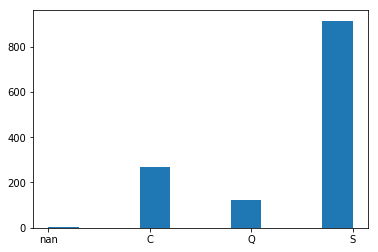

In [16]:
plt.hist(train[['Embarked']])

In [17]:
train.loc[train.Embarked.isna(),'Embarked'] = 'S'

In [18]:
train.isna().sum()

Survived        0
Pclass          0
Name            0
Sex             0
Age           263
SibSp           0
Parch           0
Ticket          0
Fare            1
Embarked        0
train_flag      0
dtype: int64

In [19]:
train.describe()

,Survived,Pclass,Age,SibSp,Parch,Fare,train_flag
count,1309.000000,1309.000000,1046.000000,1309.000000,1309.000000,1308.000000,1309.000000
mean,0.377387,2.294882,29.881138,0.498854,0.385027,33.295479,0.680672
std,0.484918,0.837836,14.413493,1.041658,0.865560,51.758668,0.466394
min,0.000000,1.000000,0.170000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,21.000000,0.000000,0.000000,7.895800,0.000000
50%,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200,1.000000
75%,1.000000,3.000000,39.000000,1.000000,0.000000,31.275000,1.000000
max,1.000000,3.000000,80.000000,8.000000,9.000000,512.329200,1.000000


In [20]:
train.loc[train.Fare.isna(),'Fare']=np.mean(train.Fare)

38% Survived   
Age는 80대까지 분포    
Fare는 3quantile과 max가 많이 떨어져있음 -> 이상치 의심

**categorical variable -> dummy variable**

* Sex encoding 

In [21]:
from sklearn.preprocessing import LabelEncoder 

# male = 1 , female= 0

def gender_encoding (data) :
    le = LabelEncoder()
    le.fit(['male','female']) 
    data['Sex'] = le.transform(data['Sex'])
    return data

In [22]:
train =  gender_encoding(train)
train.Sex.head()

PassengerId
1    1
2    0
3    0
4    0
5    1
Name: Sex, dtype: int32

*  Embarked encoding 

In [23]:
train['Embarked'].unique()

array(['S', 'C', 'Q'], dtype=object)

In [24]:
# S = 2 , C = 1, Q = 0
def embarked_encoding (data) :
    le = LabelEncoder()
    le.fit(['S','C','Q']) 
    data['Embarked'] = le.transform(data['Embarked'])
    return data

In [25]:
train =  embarked_encoding(train)
train.Embarked.head()

PassengerId
1    2
2    0
3    2
4    2
5    2
Name: Embarked, dtype: int32

**correlation**

In [26]:
corr_matrix=train.corr()
print(corr_matrix)
corr_matrix['Survived'].sort_values()

            Survived    Pclass       Sex       Age     SibSp     Parch  \
Survived    1.000000 -0.264710 -0.688371 -0.053695  0.002370  0.108919   
Pclass     -0.264710  1.000000  0.124617 -0.408106  0.060832  0.018322   
Sex        -0.688371  0.124617  1.000000  0.063645 -0.109609 -0.213125   
Age        -0.053695 -0.408106  0.063645  1.000000 -0.243699 -0.150917   
SibSp       0.002370  0.060832 -0.109609 -0.243699  1.000000  0.373587   
Parch       0.108919  0.018322 -0.213125 -0.150917  0.373587  1.000000   
Fare        0.233568 -0.558477 -0.185484  0.178229  0.160224  0.221522   
Embarked   -0.135138  0.185479  0.097960 -0.080195  0.065567  0.044772   
train_flag  0.019430  0.023988  0.010928 -0.018528  0.033867 -0.005793   

                Fare  Embarked  train_flag  
Survived    0.233568 -0.135138    0.019430  
Pclass     -0.558477  0.185479    0.023988  
Sex        -0.185484  0.097960    0.010928  
Age         0.178229 -0.080195   -0.018528  
SibSp       0.160224  0.065567    

Sex          -0.688371
Pclass       -0.264710
Embarked     -0.135138
Age          -0.053695
SibSp         0.002370
train_flag    0.019430
Parch         0.108919
Fare          0.233568
Survived      1.000000
Name: Survived, dtype: float64

상관관계를 가지는것은 Sex와 Pclass Fare 정도라고 볼 수 있음 

**pairplot** 

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1309 entries, 1 to 1309
Data columns (total 11 columns):
Survived      1309 non-null int64
Pclass        1309 non-null int64
Name          1309 non-null object
Sex           1309 non-null int32
Age           1046 non-null float64
SibSp         1309 non-null int64
Parch         1309 non-null int64
Ticket        1309 non-null object
Fare          1309 non-null float64
Embarked      1309 non-null int32
train_flag    1309 non-null int64
dtypes: float64(2), int32(2), int64(5), object(2)
memory usage: 112.5+ KB


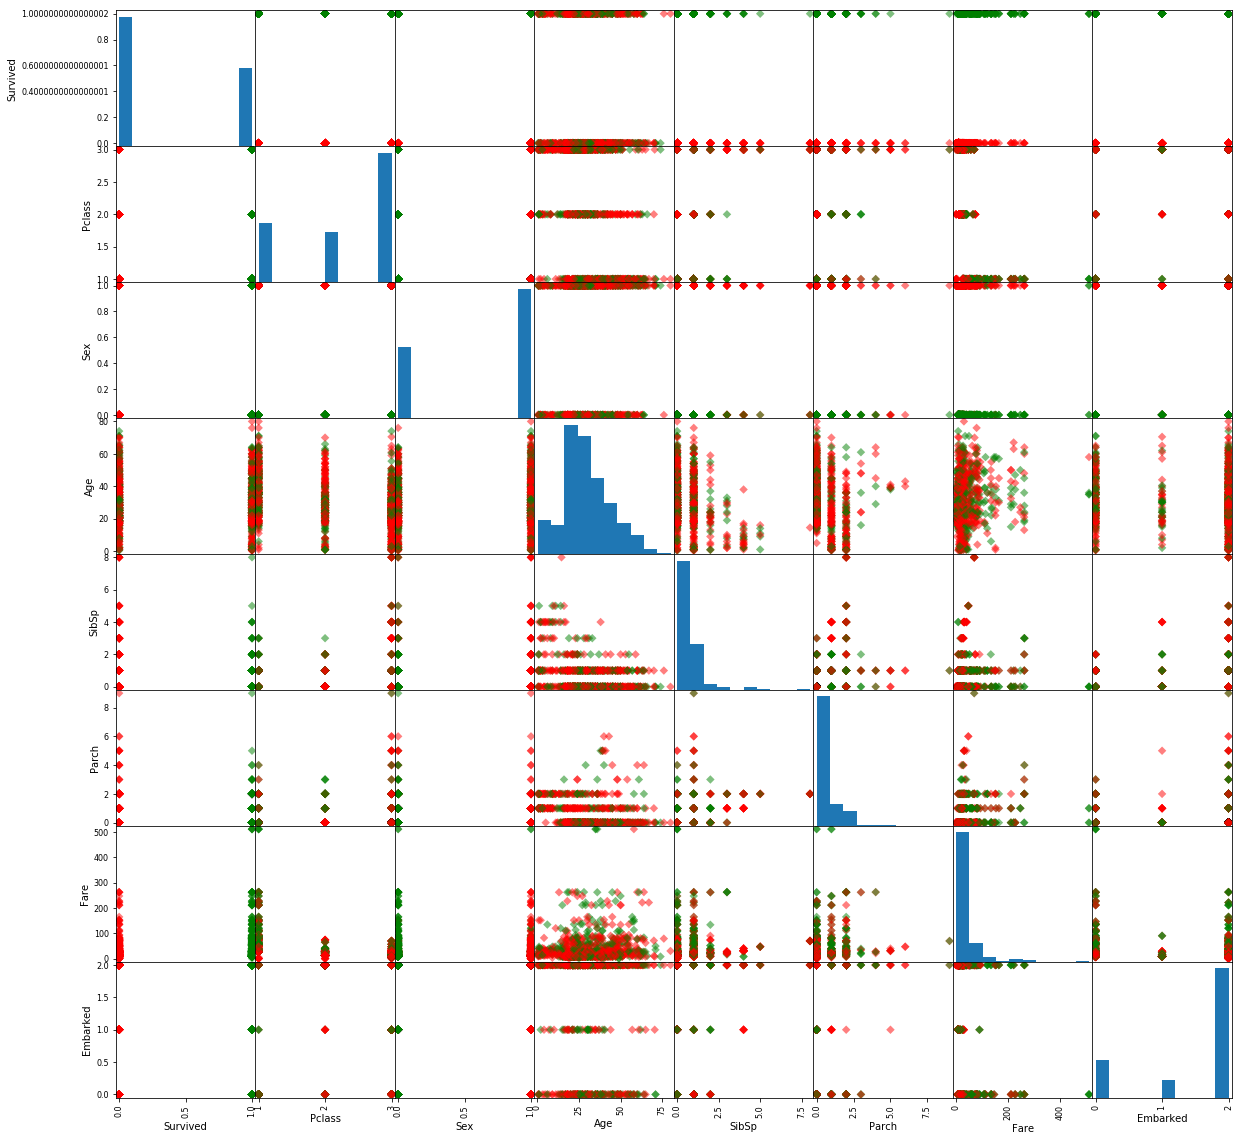

In [27]:
colors=['red','green']
columns =['Survived', 'Pclass', 'Sex', 'Age', 'SibSp', 'Parch',
       'Fare', 'Embarked']
# make a scatter plot
scatter_matrix(train[columns],figsize=[20,20],marker='D',c=train.Survived.apply(lambda x:colors[x]))
train.info()

**relationship with survived**

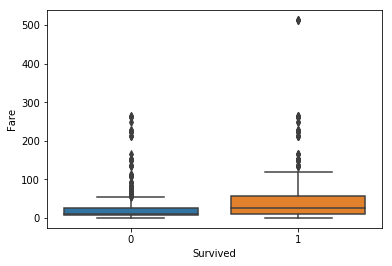

In [28]:
sns.boxplot(x='Survived',y='Fare',data=train)

생존한사람들의 Fare는 그렇지 않은 사람보다 높다 

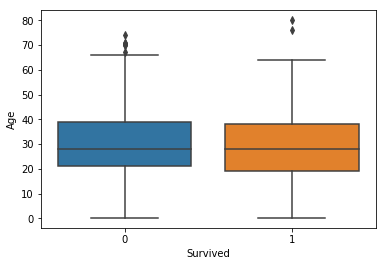

In [29]:
sns.boxplot(x='Survived',y='Age',data=train)

생존된 사람이나 그렇지 않은 사람은 비슷한 Age의 분포를 보임 

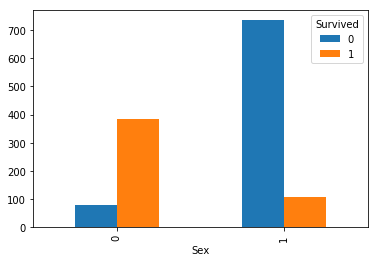

Sex         0    1
Survived          
0          81  734
1         385  109


In [30]:
sex_df = train.groupby(['Sex','Survived'])['Survived'].count().unstack('Survived')
sex_df.plot(kind='bar')
plt.show()
print(pd.crosstab(train['Survived'],train['Sex']))

생존된 사람들중에는 남자보다 여자가 더 많음 

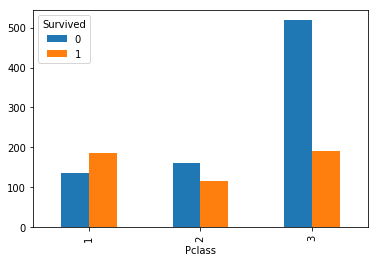

Pclass      1    2    3
Survived               
0         137  160  518
1         186  117  191


In [31]:
pclass_df = train.groupby(['Pclass','Survived'])['Survived'].count().unstack('Survived')
pclass_df.plot(kind='bar')
plt.show()
print(pd.crosstab(train['Survived'],train['Pclass']))

생존된 사람들 중에서는 Pclass가 높은사람이 많으며 생존되지 못한 사람들중에서는 Pclass가 낮을수록 수가 증가함 

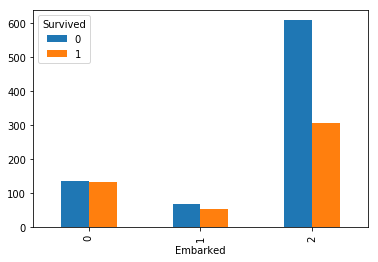

Embarked    0   1    2
Survived              
0         137  69  609
1         133  54  307


In [32]:
embarked_df = train.groupby(['Embarked','Survived'])['Survived'].count().unstack('Survived')
embarked_df.plot(kind='bar')
plt.show()
print(pd.crosstab(train['Survived'],train['Embarked']))

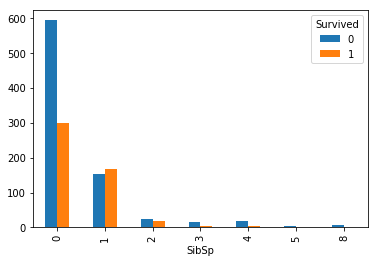

SibSp       0    1   2   3   4  5  8
Survived                            
0         593  153  23  15  18  5  8
1         298  166  19   5   4  1  1


In [33]:
sibsp_df = train.groupby(['SibSp','Survived'])['Survived'].count().unstack('Survived')
sibsp_df.plot(kind='bar')
plt.show()
print(pd.crosstab(train['Survived'],train['SibSp']))

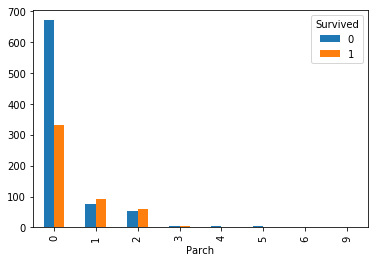

Parch       0   1   2  3  4  5  6  9
Survived                            
0         670  77  53  3  4  5  2  1
1         332  93  60  5  2  1  0  1


In [34]:
parch_df = train.groupby(['Parch','Survived'])['Survived'].count().unstack('Survived')
parch_df.plot(kind='bar')
plt.show()
print(pd.crosstab(train['Survived'],train['Parch']))

SibSp 와 Parch가 0일때 사람수가 가장 많음  
SibSp=0 ,Parch=0 이고 아닌 경우로 구분 

Alone이라는 새로운 변수 추가 

In [35]:
train['Alone']=0
train.loc[(train.SibSp==0) & (train.Parch==0),'Alone'] = 1

In [36]:
train.corr()['Survived']

Survived      1.000000
Pclass       -0.264710
Sex          -0.688371
Age          -0.053695
SibSp         0.002370
Parch         0.108919
Fare          0.233568
Embarked     -0.135138
train_flag    0.019430
Alone        -0.216299
Name: Survived, dtype: float64

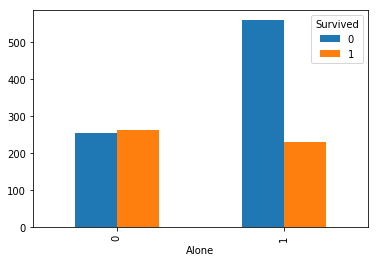

Alone       0    1
Survived          
0         256  559
1         263  231


In [37]:
parch_df = train.groupby(['Alone','Survived'])['Survived'].count().unstack('Survived')
parch_df.plot(kind='bar')
plt.show()
print(pd.crosstab(train['Survived'],train['Alone']))

사망자 중에서 SibSp=0 & Parch=0인 사람이 많음 

**Age 결측치 처리** 
* knn, 회귀 대체 사용
* Age와 관련된 변수찾기 


In [38]:
train.corr()['Age']

Survived     -0.053695
Pclass       -0.408106
Sex           0.063645
Age           1.000000
SibSp        -0.243699
Parch        -0.150917
Fare          0.178229
Embarked     -0.080195
train_flag   -0.018528
Alone         0.128755
Name: Age, dtype: float64

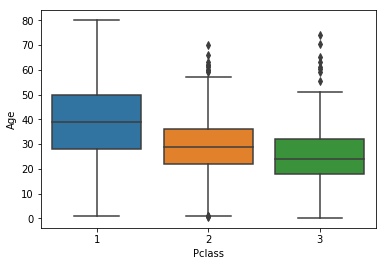

In [39]:
sns.boxplot(x='Pclass',y='Age',data=train)

Pclass 등급이 낮을수록 Age가 대체적으로 낮아짐 

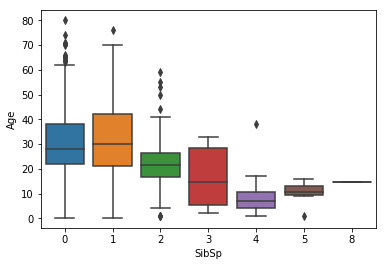

In [40]:
sns.boxplot(x='SibSp',y='Age',data=train)

미미하지만 SibSp가 클수록 평균 Age가 낮아짐 

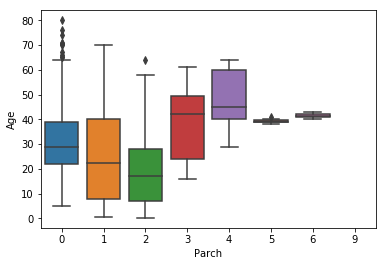

In [41]:
sns.boxplot(x='Parch',y='Age',data=train)

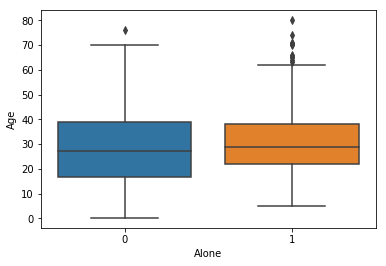

In [42]:
sns.boxplot(x='Alone',y='Age',data=train)

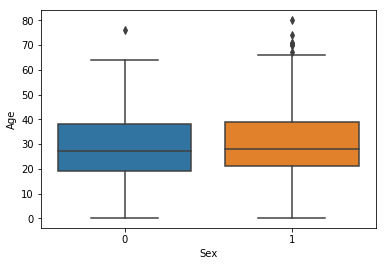

In [43]:
sns.boxplot(x='Sex',y='Age',data=train)

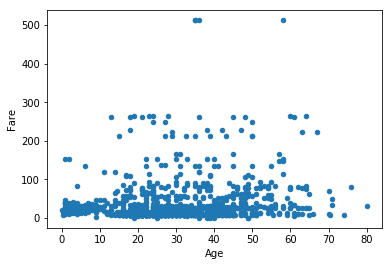

In [44]:
train.plot(kind='scatter',x='Age',y='Fare')

- knn-impute

[325.03003087271065, 228.42984869551282, 198.60174500071224, 188.60575000618132, 180.36194406410257, 179.25728419993897, 177.11929135712415, 177.64158596943682, 177.0738252555397, 176.31115635752744, 174.79675612183274, 171.52134960978202, 168.50139270376272, 168.88513912608863, 167.43729594564508, 165.38889144391743, 163.8592025894172, 163.98839319905713, 165.2098182411824, 165.42639405464743, 165.92429413469432, 165.8699487070051, 166.12482881460807, 166.51719253814036, 166.53085033703593, 165.98050797406367, 165.21800974054855, 164.94012280871434, 164.18709893188708, 163.78771645128714, 163.71883416137797, 164.35737678963753, 164.1029825739042, 163.82947876776288, 163.82775901026986, 164.17580148820053, 164.2705417865518, 164.3372958202154, 164.99096680645806, 164.6833168123947]

min error K = 31


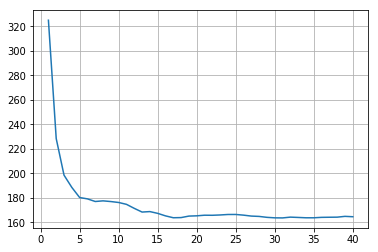

In [45]:

from sklearn.model_selection import cross_val_score, KFold
from sklearn.neighbors import KNeighborsRegressor

scores = []
columns = ['Pclass','SibSp']
train_X_age = train.loc[train['Age'].isna() != True,columns]
train_y_age = train.loc[train['Age'].isna() != True,'Age']
test_X_age = train.loc[train['Age'].isna(),columns]

for k in range(1, 41):
    knn = KNeighborsRegressor(n_neighbors=k)
    mse_s = -cross_val_score(knn, train_X_age, train_y_age, cv=10, scoring='neg_mean_squared_error')
    scores.append(mse_s.mean())
    
print(scores)   

plt.plot(range(1,41), scores)
plt.grid()
print("\nmin error K = %d" % ( np.argmin(scores) +1 ) )  

In [46]:
knn = KNeighborsRegressor(n_neighbors = 31)
knn.fit(train_X_age, train_y_age)
knn_predict = knn.predict(test_X_age)

for i in range(0,len(knn_predict)):
    r =  round(knn_predict[i])
    knn_predict[i]=r 

In [47]:
knn_predict

array([30., 38., 30., 30., 30., 30., 43., 30., 30., 30., 30., 25., 30.,
       19., 43., 43., 25., 30., 30., 30., 30., 30., 30., 30., 25., 30.,
       30., 25., 30., 30., 30.,  9., 43., 43., 13.,  9., 38., 43., 25.,
       30., 30.,  9., 25., 30., 13., 30., 25., 25., 30., 43., 30., 30.,
       43., 30., 38., 43., 43., 43., 30., 19., 38., 30., 43.,  9., 19.,
       43., 30., 25., 43., 30., 30., 30., 25., 30., 30., 43., 30., 30.,
       13., 30., 30., 38., 30., 30., 30., 30., 25., 30., 25., 30., 43.,
       30., 30., 38., 30., 30., 43., 38., 13., 25., 30., 30., 30., 43.,
       30., 30., 30., 30., 43., 30., 30., 30., 38., 30., 43., 30., 30.,
       30., 30., 30., 25., 30., 30., 30., 38., 30., 30., 43., 30., 25.,
       30., 30., 43., 25., 30., 30., 30., 30., 30., 30., 43., 38., 30.,
       30., 30., 25., 43., 30., 30., 38., 30., 30., 43., 30., 43., 25.,
       30., 30., 30., 25., 30.,  9., 43., 43., 30., 30., 30., 30., 30.,
       43.,  9., 43., 30.,  9., 30., 30., 25., 30., 43., 19., 25

In [48]:
knn_train = train.copy()
knn_train.loc[knn_train['Age'].isna(),'Age']=knn_predict
knn_train.isna().sum()

Survived      0
Pclass        0
Name          0
Sex           0
Age           0
SibSp         0
Parch         0
Ticket        0
Fare          0
Embarked      0
train_flag    0
Alone         0
dtype: int64

- LinearRegression impute

In [49]:
from sklearn.linear_model import LinearRegression

reg = LinearRegression()
reg.fit(train_X_age, train_y_age)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [50]:
reg_predict =  reg.predict(test_X_age)

for i in range(0,len(reg_predict)):
    r =  round(abs(reg_predict[i]))
    reg_predict[i]=r 

In [51]:
reg_predict 

array([26., 33., 26., 26., 26., 26., 36., 26., 26., 26., 26., 23., 26.,
       19., 40., 40., 23., 26., 26., 26., 26., 26., 26., 26., 23., 26.,
       26., 23., 26., 26., 26.,  2., 40., 40., 16.,  2., 33., 40., 23.,
       26., 26.,  2., 23., 26., 16., 26., 23., 23., 26., 40., 26., 26.,
       40., 26., 33., 40., 40., 40., 26., 19., 33., 26., 40.,  2., 19.,
       36., 26., 23., 40., 26., 26., 26., 23., 26., 26., 36., 26., 26.,
       16., 26., 26., 33., 26., 26., 26., 26., 23., 26., 23., 26., 36.,
       26., 26., 33., 26., 26., 40., 33., 16., 23., 26., 26., 26., 40.,
       26., 26., 26., 26., 40., 26., 26., 26., 33., 26., 40., 26., 26.,
       26., 26., 26., 23., 26., 26., 26., 33., 26., 26., 40., 26., 23.,
       26., 26., 40., 23., 26., 26., 26., 26., 26., 26., 36., 33., 26.,
       26., 26., 23., 40., 26., 26., 33., 26., 26., 40., 26., 40., 23.,
       26., 26., 26., 23., 26.,  2., 40., 40., 26., 26., 26., 26., 26.,
       40.,  2., 36., 26.,  2., 26., 26., 23., 26., 40., 19., 23

In [52]:
pred_y = reg.predict(train_X_age)
residuals = train_y_age-pred_y
residuals

PassengerId
1       -0.718383
2        1.665060
3       -0.272572
4       -1.334940
5        8.727428
7       14.110870
8      -13.610004
9        0.727428
10     -15.526662
11     -18.718383
12      18.110870
13      -6.272572
14      16.281617
15     -12.272572
16      21.919149
17     -10.055815
19       8.281617
21       1.919149
22       0.919149
23     -11.272572
24     -11.889130
25      -7.610004
26      15.281617
28     -10.226562
31       0.110870
34      32.919149
35      -8.334940
36       5.665060
38      -5.272572
39      -1.164194
          ...    
1273    -0.272572
1275    -3.718383
1277    -5.526662
1278    -2.272572
1279    23.919149
1280    -5.272572
1281    -9.610004
1282   -16.889130
1283    11.110870
1284   -13.272572
1285    13.919149
1286    13.389996
1287   -18.334940
1288    -2.272572
1289    11.665060
1290    -4.272572
1291     4.727428
1292    -9.889130
1293     8.473338
1294   -17.889130
1295   -22.889130
1296     6.665060
1297   -13.080851
1298    -6.52666

Text(0,0.5,'residuals')

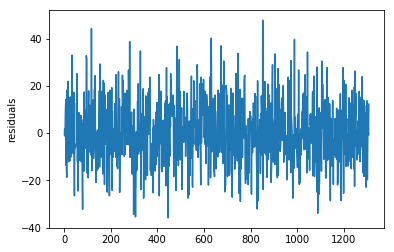

In [53]:
plt.plot(residuals)
plt.ylabel("residuals")

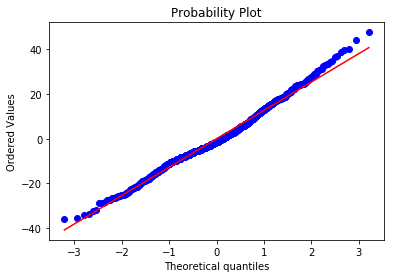

In [54]:
import pylab
import scipy.stats as stats

stats.probplot(residuals, dist="norm",plot=pylab)
pylab.show()

정규성, 등분산성, 독립성 만족

In [55]:
reg_train = train.copy()
reg_train.loc[reg_train['Age'].isna(),'Age'] =reg_predict

**train-test set split** 

In [56]:
#train_flag 없애기 
train_reg = reg_train.loc[reg_train['train_flag']==1,:]
test_reg = reg_train.loc[reg_train['train_flag']==0,:]
train_reg.drop('train_flag',axis=1,inplace=True)
test_reg.drop('train_flag',axis=1,inplace=True)


train_knn = knn_train.loc[knn_train['train_flag']==1,:]
test_knn = knn_train.loc[knn_train['train_flag']==0,:]
train_knn.drop('train_flag',axis=1,inplace=True)
test_knn.drop('train_flag',axis=1,inplace=True)

columns = ['Pclass','Sex','Age','SibSp','Parch','Fare','Embarked','Alone']
knn_train_X = train_knn.loc[:,columns]
knn_train_y = train_knn.loc[:,'Survived']
test_knn_X = test_knn.loc[:,columns]
test_knn_y =test_knn.loc[:,'Survived']

columns = ['Pclass','Sex','Age','SibSp','Parch','Fare','Embarked','Alone']
reg_train_X = train_reg.loc[:,columns]
reg_train_y = train_reg.loc[:,'Survived']
test_reg_X = test_reg.loc[:,columns]
test_reg_y =test_reg.loc[:,'Survived']


C:\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.
C:\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """
C:\Anaconda3\lib\site-packages\ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  # Remove the CWD from sys.path while we load stuff.
C:\Anaconda3\lib\site-packages\ipykernel_launcher.py:11: SettingWithCopyWarning: 
A value

## modeling 

**knn-impute**

random-forest, logistic-regression, decision-tree, ensemble 

In [57]:
from sklearn.ensemble import RandomForestClassifier 
from sklearn.model_selection import cross_val_predict

# random-forest
forest_clf =  RandomForestClassifier(random_state=42)
forest_clf.fit(knn_train_X, knn_train_y)
forest_pred =forest_clf.predict(test_knn_X)


# logistric-regression

from sklearn.linear_model import LogisticRegression

log_reg = LogisticRegression(solver='liblinear')
log_reg.fit(knn_train_X,knn_train_y)

logistic_pred = log_reg.predict(test_knn_X)


from sklearn.tree import DecisionTreeClassifier

clf_tree =  DecisionTreeClassifier(max_leaf_nodes=6, random_state=11) #tree hyper-parameter 
clf_tree.fit(knn_train_X, knn_train_y)

tree_pred = clf_tree.predict(test_knn_X)  

C:\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


In [58]:
import os, sys
from sklearn.externals.six import StringIO
if os.name == 'nt':      # if windows
    import pydot         # conda install pydot   (Anaconda package list has it)
elif os.name == 'posix' :  # if Linux, Mac ...        
    import pydotplus     # Linux : pip install pydotplus & sudo apt-get install graphviz 

from IPython.display import Image
from sklearn import tree

def show_tree(decision_tree, feature_names=None, class_names=None):   
    dot_data = StringIO()
    tree.export_graphviz(decision_tree, out_file=dot_data, feature_names=feature_names, 
                    class_names=class_names, filled=True, rounded=True)
    
    if os.name == 'nt':      # if windows
        graph = pydot.graph_from_dot_data(dot_data.getvalue())[0]
    elif os.name == 'posix' :  # if Linux, Mac ...        
        graph = pydotplus.graph_from_dot_data(dot_data.getvalue())    # for linux 

    return(graph) 

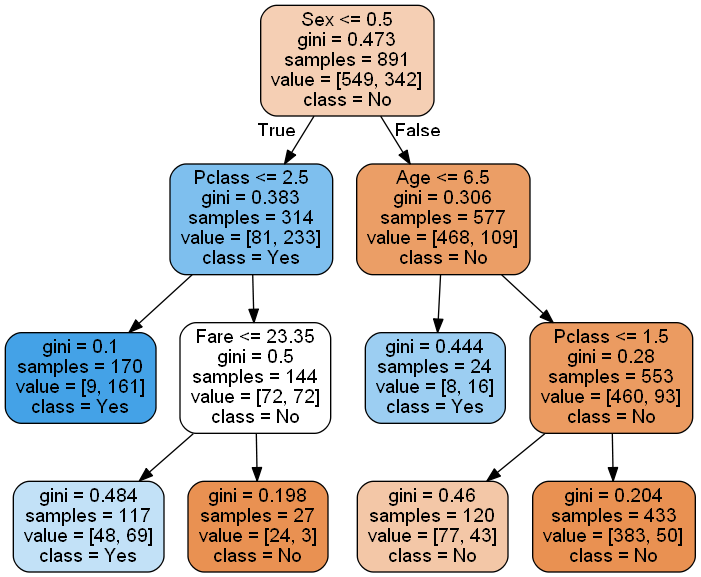

In [59]:
graph = show_tree(clf_tree, feature_names=list(knn_train_X), class_names=['No','Yes'])
Image(graph.create_png())

In [60]:
print('RandomForest accuracy : {0} %'.format((test_knn_y == forest_pred).mean()*100 ))
print('Logistic-Regression accuracy : {0} %'.format((test_knn_y == logistic_pred).mean()*100 ))
print('Decision-tree accuracy : {0} %'.format((test_knn_y == tree_pred).mean()*100 ))

RandomForest accuracy : 80.14354066985646 %
Logistic-Regression accuracy : 95.93301435406698 %
Decision-tree accuracy : 96.65071770334929 %


In [61]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import VotingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC

log_clf = LogisticRegression(random_state=42)
rnd_clf = RandomForestClassifier(random_state=42)
dec_clf = DecisionTreeClassifier(max_leaf_nodes=6,random_state=42)

voting_clf = VotingClassifier(
    estimators=[('lr', log_clf), ('rf', rnd_clf), ('dec', dec_clf)],
    voting='hard')

In [62]:
voting_clf.fit(knn_train_X, knn_train_y)

C:\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


VotingClassifier(estimators=[('lr', LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=42, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)), ('rf', RandomFore...plit=2, min_weight_fraction_leaf=0.0,
            presort=False, random_state=42, splitter='best'))],
         flatten_transform=None, n_jobs=None, voting='hard', weights=None)

In [63]:
from sklearn.metrics import accuracy_score

for clf in (log_clf, rnd_clf, dec_clf, voting_clf):
    clf.fit(knn_train_X, knn_train_y)
    y_pred = clf.predict(test_knn_X)
    print(clf.__class__.__name__, accuracy_score(test_knn_y, y_pred))

LogisticRegression 0.9593301435406698


C:\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


RandomForestClassifier 0.8014354066985646
DecisionTreeClassifier 0.9665071770334929
VotingClassifier 0.9593301435406698


**reg-impute**

random-forest, logistic-regression, decision-tree, ensemble 

In [64]:
from sklearn.ensemble import RandomForestClassifier 
from sklearn.model_selection import cross_val_predict

# random-forest
forest_clf =  RandomForestClassifier(random_state=42)
forest_clf.fit(reg_train_X, reg_train_y)
forest_pred =forest_clf.predict(test_reg_X)


# logistric-regression

from sklearn.linear_model import LogisticRegression

log_reg = LogisticRegression(solver='liblinear')
log_reg.fit(reg_train_X,reg_train_y)

logistic_pred = log_reg.predict(test_reg_X)


from sklearn.tree import DecisionTreeClassifier

clf_tree =  DecisionTreeClassifier(max_leaf_nodes=6, random_state=11) #tree hyper-parameter 
clf_tree.fit(reg_train_X, reg_train_y)

tree_pred = clf_tree.predict(test_reg_X)  

C:\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


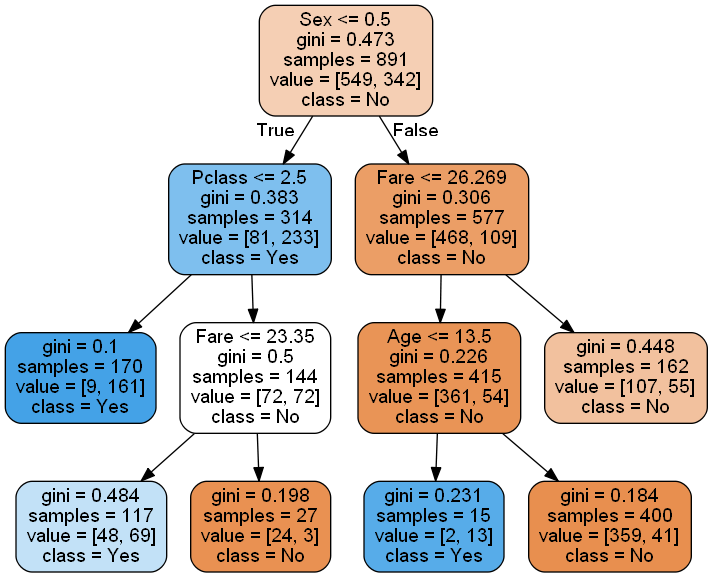

In [65]:
graph = show_tree(clf_tree, feature_names=list(reg_train_X), class_names=['No','Yes'])
Image(graph.create_png())

In [66]:
print('RandomForest accuracy : {0} %'.format((test_reg_y == forest_pred).mean()*100 ))
print('Logistic-Regression accuracy : {0} %'.format((test_reg_y == logistic_pred).mean()*100 ))
print('Decision-tree accuracy : {0} %'.format((test_reg_y == tree_pred).mean()*100 ))

RandomForest accuracy : 82.29665071770334 %
Logistic-Regression accuracy : 96.17224880382776 %
Decision-tree accuracy : 96.17224880382776 %


### voting Ensemble 

In [67]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import VotingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC

log_clf = LogisticRegression(random_state=42)
rnd_clf = RandomForestClassifier(random_state=42)
dec_clf = DecisionTreeClassifier(max_leaf_nodes=6,random_state=42)

voting_clf = VotingClassifier(
    estimators=[('lr', log_clf), ('rf', rnd_clf), ('dec', dec_clf)],
    voting='hard')

In [68]:
voting_clf.fit(reg_train_X, reg_train_y)

C:\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


VotingClassifier(estimators=[('lr', LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=42, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)), ('rf', RandomFore...plit=2, min_weight_fraction_leaf=0.0,
            presort=False, random_state=42, splitter='best'))],
         flatten_transform=None, n_jobs=None, voting='hard', weights=None)

In [69]:
from sklearn.metrics import accuracy_score

for clf in (log_clf, rnd_clf, dec_clf, voting_clf):
    clf.fit(reg_train_X, reg_train_y)
    y_pred = clf.predict(test_reg_X)
    print(clf.__class__.__name__, accuracy_score(test_reg_y, y_pred))

LogisticRegression 0.9617224880382775
RandomForestClassifier 0.8229665071770335
DecisionTreeClassifier 0.9617224880382775
VotingClassifier 0.9617224880382775


C:\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


### DNN

In [70]:
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.utils import shuffle
import numpy as np
import tensorflow as tf
 
def inference(x, keep_prob, n_in, n_hiddens, n_out):
    def weight_variable(shape):
        initial = tf.truncated_normal(shape, stddev=0.01)
        return tf.Variable(initial)
 
    def bias_variable(shape):
        initial = tf.zeros(shape)
        return tf.Variable(initial)
 
    # 입력층-은닉층과 은닉층-은닉층 설계
    for i, n_hidden in enumerate(n_hiddens):
        if i == 0:  # 입력층-은닉층
            input = x
            input_dim = n_in
        else:   # 은닉층-은닉층
            input = output  # 출력층이 다음 입력층이 된다
            input_dim = n_hiddens[i-1]
 
        W = weight_variable([input_dim, n_hidden])  # weight의 shape은 입력층 차원(784) x 뉴런의 개수
        b = bias_variable([n_hidden])               # bias의 shape은 뉴런의 개수
 
        hidden_layer = tf.nn.relu(tf.matmul(input, W) + b)  # 은닉층의 활성화 함수로 ReLU를 사용
        output = tf.nn.dropout(hidden_layer, keep_prob=keep_prob)   # 출력은 드롭아웃을 적용
 
    # 은닉층-출력층 설계
    W_out = weight_variable([n_hiddens[-1], n_out]) # 출력층의 weight shape은 뉴런의 개수 x 출력층의 차원
    b_out = bias_variable([n_out])                  # bias의 shape은 출력층의 차원
 
    hypothesis = tf.nn.softmax(tf.matmul(output, W_out) + b_out)    # 출력 활성화 함수는 softmax를 사용
 
    return hypothesis
 
def loss(hypothesis, y):
    # cross entropy
    cross_entropy = tf.reduce_mean(-tf.reduce_sum(y * tf.log(hypothesis), reduction_indices=[1]))
 
    return cross_entropy
 
def train(loss):
    optimizer = tf.train.GradientDescentOptimizer(learning_rate=0.01)
    train = optimizer.minimize(loss)
 
    return train
 
def accuracy(hypothesis, y):
    correct_prediction = tf.equal(tf.argmax(hypothesis, 1), tf.argmax(y, 1))
    accuracy = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))
 
    return accuracy
 
if __name__ == '__main__':
    # 1. 데이터를 준비
    X = reg_train_X
    y = reg_train_y
    y = np.eye(2)[y.astype(int)]  # one hot encoding 표현으로 변환
 
    # 학습 데이터와 validation 데이터를 80:20으로 나눈다
    n = len(X)
    N = int(n * 1.00) 
    N_val = int(N * 0.2)
    X_train, X_val, Y_train, Y_val = train_test_split(X, y, test_size=N_val)
 
    # 2. 모델을 설정한다
    # 입출력 데이터와 은닉층의 뉴런 개수 설정
    n_in = X.shape[1]  # 입력 데이터 변수 개수 
    n_hiddens = [200, 200, 200]  # 각 은닉층의 뉴런 개수
    n_out = len(y[0])  # 출력 데이터의 개수 
    p_keep = 0.5        # 드롭아웃 확률의 비율
 
    x = tf.placeholder(tf.float32, shape=[None, n_in])
    y = tf.placeholder(tf.float32, shape=[None, n_out])
 
    keep_prob = tf.placeholder(tf.float32)
 
    # 가설식을 그래프에 추가
    hypothesis = inference(x, keep_prob, n_in=n_in, n_hiddens=n_hiddens, n_out=n_out)
 
    # 오차 함수를 그래프에 추가
    loss = loss(hypothesis, y)
 
    # 학습 함수를 그래프에 추가
    train = train(loss)
 
    # 정확도 예측 함수 그래프에 추가
    accuracy = accuracy(hypothesis, y)
 
    # 3. 모델을 학습시키면서 그래프를 실행
    epochs = 100
    batch_size = 100
 
    init = tf.global_variables_initializer()
    sess = tf.Session()
    sess.run(init)
 
    n_batches = N // batch_size
 
    for epoch in range(epochs):
        X_, Y_ = shuffle(X_train, Y_train)
 
        for i in range(n_batches):
 
            start = i * batch_size
            end = start + batch_size
 
            sess.run(train, feed_dict={x: X_[start: end], y: Y_[start: end], keep_prob: p_keep})
 
        accuracy_rate = accuracy.eval(session=sess, feed_dict={x: X_val, y: Y_val, keep_prob: p_keep})
        print(epoch+1,f'Validation accuracy rate per epoch: {accuracy_rate}')
 
    # 4. 모델을 평가
    test_y= np.eye(2)[test_reg_y.astype(int)] 
    accuracy_rate = accuracy.eval(session=sess, feed_dict={x: test_reg_X, y: test_y, keep_prob: 1.0})
    print(f'Test Accuracy : {accuracy_rate}')

C:\Anaconda3\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


1 Validation accuracy rate per epoch: 0.5898876190185547
2 Validation accuracy rate per epoch: 0.584269642829895
3 Validation accuracy rate per epoch: 0.584269642829895
4 Validation accuracy rate per epoch: 0.584269642829895
5 Validation accuracy rate per epoch: 0.584269642829895
6 Validation accuracy rate per epoch: 0.584269642829895
7 Validation accuracy rate per epoch: 0.584269642829895
8 Validation accuracy rate per epoch: 0.584269642829895
9 Validation accuracy rate per epoch: 0.584269642829895
10 Validation accuracy rate per epoch: 0.584269642829895
11 Validation accuracy rate per epoch: 0.584269642829895
12 Validation accuracy rate per epoch: 0.584269642829895
13 Validation accuracy rate per epoch: 0.584269642829895
14 Validation accuracy rate per epoch: 0.584269642829895
15 Validation accuracy rate per epoch: 0.584269642829895
16 Validation accuracy rate per epoch: 0.584269642829895
17 Validation accuracy rate per epoch: 0.584269642829895
18 Validation accuracy rate per epoch: 

가장 높은 예측률은 knn-impute Decision-Tree 96.65% 